In [75]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [76]:
data = pd.read_csv("heart.csv", delimiter=",")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
data.shape

(303, 14)

In [78]:
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
Y = data['output'].values

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [80]:
heartTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
heartTree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [81]:
predTree = heartTree.predict(X_test)

print (predTree[0:5])
print (Y_test[0:5])

[0 1 1 0 1]
[0 0 1 0 1]


In [82]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, predTree))

DecisionTrees's Accuracy:  0.8852459016393442


### Visualization

In [83]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

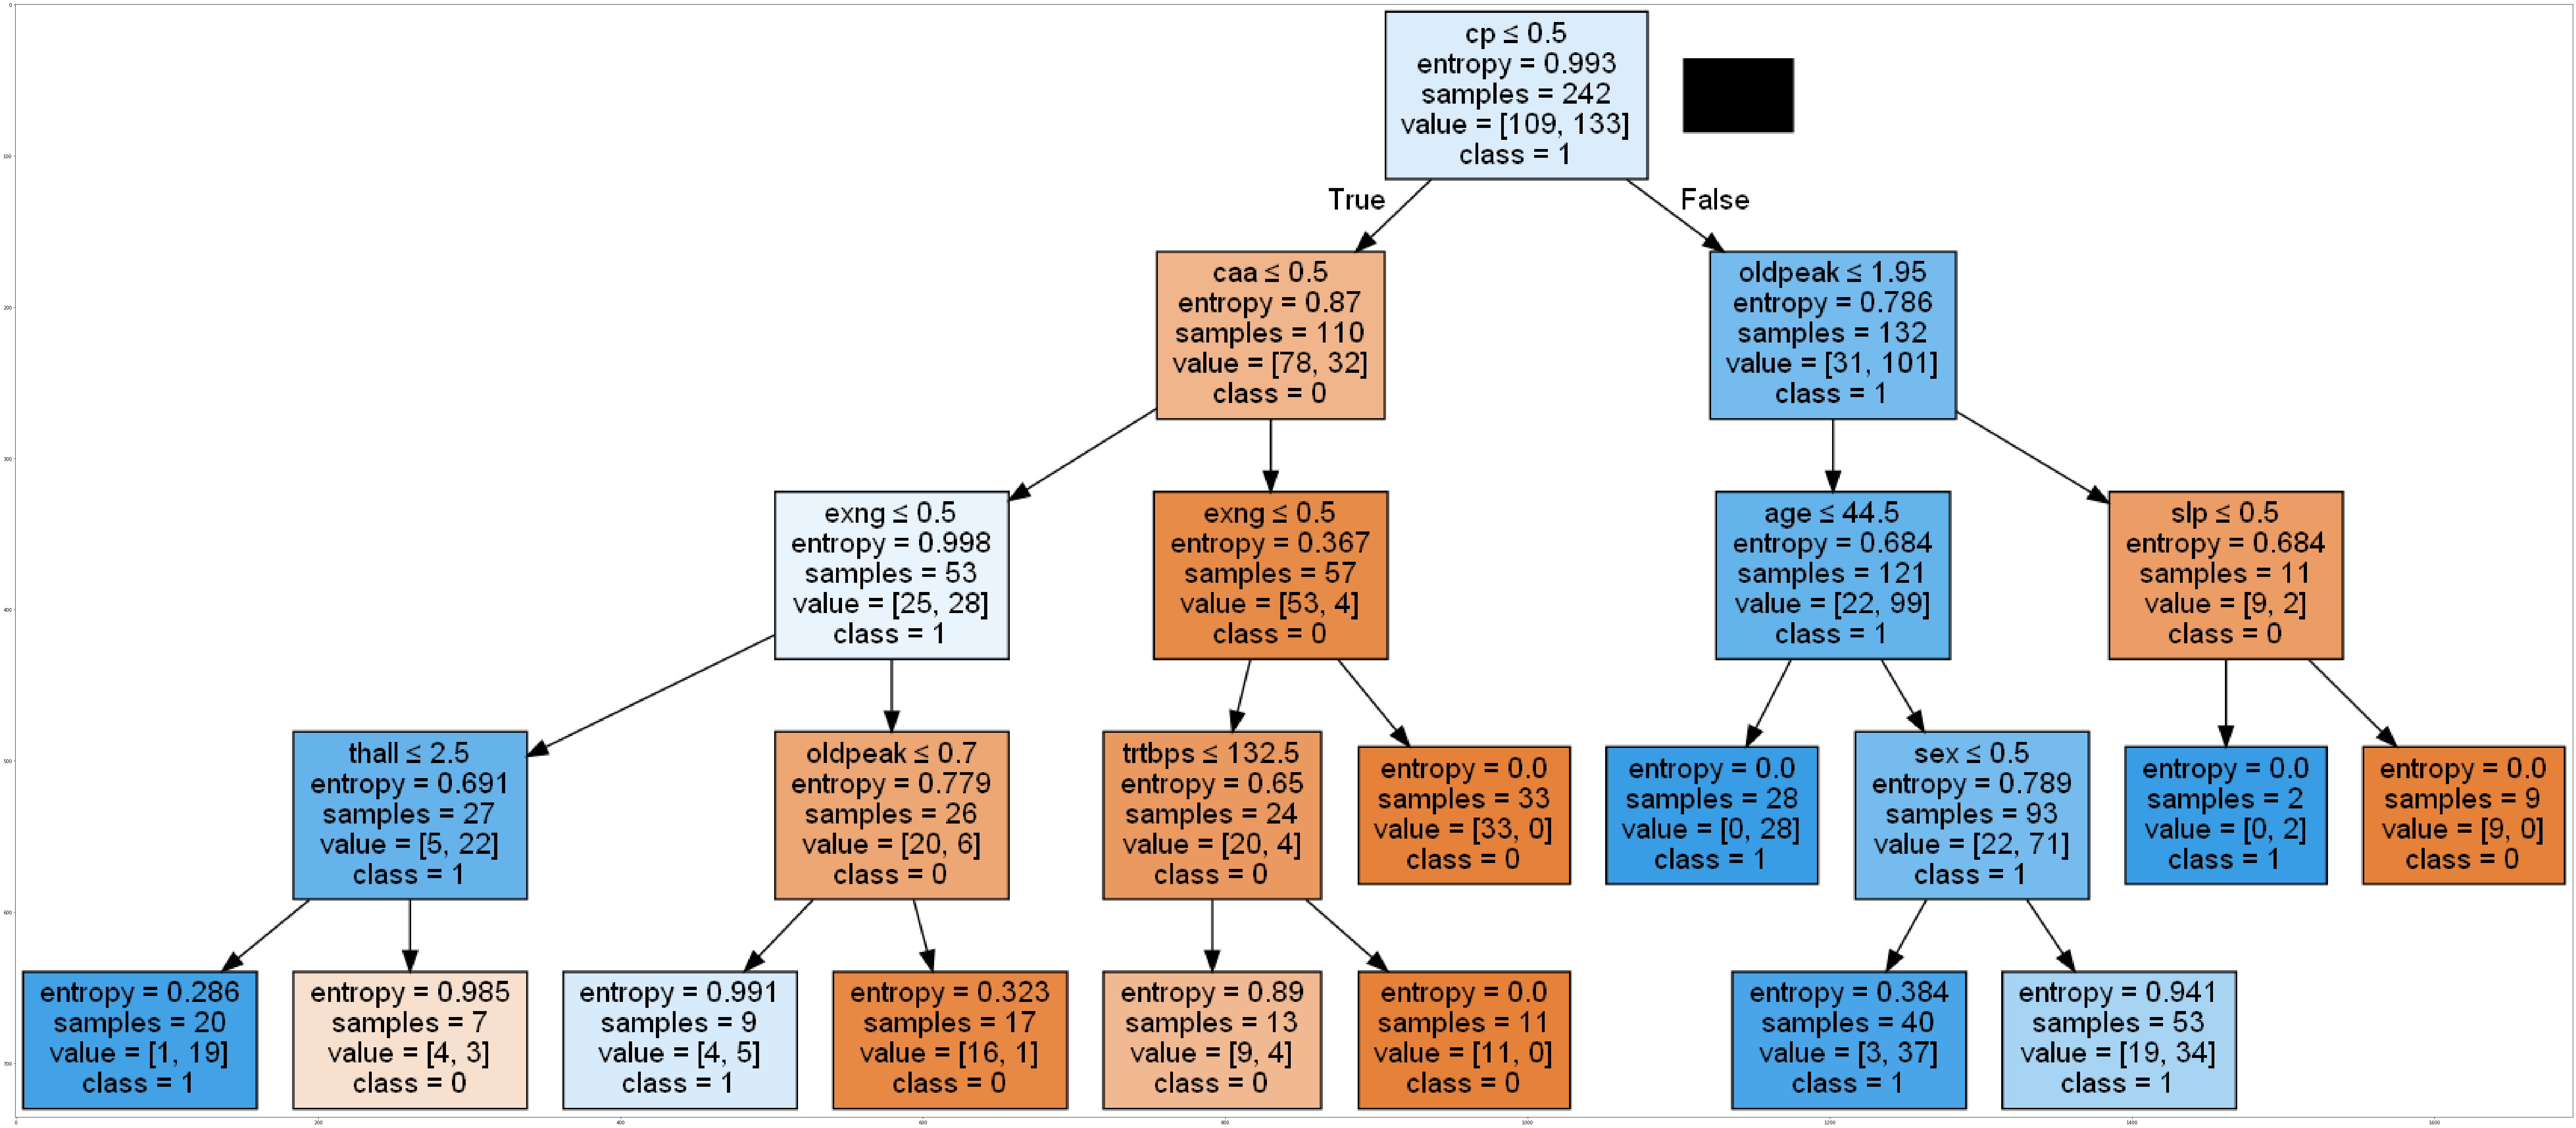

In [84]:
dot_data = StringIO()
filename = "hearttree.png"
featureNames = data.columns[0:13]
out = tree.export_graphviz(heartTree, feature_names=featureNames, class_names=['0', '1'], out_file=dot_data, filled=True, special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')